**This notebook is derived from the tutorial on [Data Cleaning](https://www.kaggle.com/learn/data-cleaning) by [Rachael Tatman](https://www.kaggle.com/rtatman) at [kaggle](https://www.kaggle.com/)**

# Parsing Dates

## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

import warnings
warnings.filterwarnings('ignore')

## Importing Data
[catalog.csv](https://www.kaggle.com/nasa/landslide-events): <br>
The Global Landslide Catalog (GLC) was developed with the goal of identifying rainfall-triggered landslide events around the world, regardless of size, impacts, or location. The GLC considers all types of mass movements triggered by rainfall, which have been reported in the media, disaster databases, scientific reports, or other sources.

In [5]:
landslides = pd.read_csv("catalog.csv")
landslides.head()

,id,date,time,continent_code,country_name,country_code,state/province,population,city/town,distance,...,geolocation,hazard_type,landslide_type,landslide_size,trigger,storm_name,injuries,fatalities,source_name,source_link
0,34,3/2/07,Night,NaN,United States,US,Virginia,16000,Cherry Hill,3.40765,...,"(38.600900000000003, -77.268199999999993)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,NBC 4 news,http://www.nbc4.com/news/11186871/detail.html
1,42,3/22/07,NaN,NaN,United States,US,Ohio,17288,New Philadelphia,3.33522,...,"(40.517499999999998, -81.430499999999995)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,Canton Rep.com,http://www.cantonrep.com/index.php?ID=345054&C...
2,56,4/6/07,NaN,NaN,United States,US,Pennsylvania,15930,Wilkinsburg,2.91977,...,"(40.4377, -79.915999999999997)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,The Pittsburgh Channel.com,https://web.archive.org/web/20080423132842/htt...
3,59,4/14/07,NaN,NaN,Canada,CA,Quebec,42786,Châteauguay,2.98682,...,"(45.322600000000001, -73.777100000000004)",Landslide,Riverbank collapse,Small,Rain,NaN,NaN,NaN,Le Soleil,http://www.hebdos.net/lsc/edition162007/articl...
4,61,4/15/07,NaN,NaN,United States,US,Kentucky,6903,Pikeville,5.66542,...,"(37.432499999999997, -82.493099999999998)",Landslide,Landslide,Small,Downpour,NaN,NaN,0.0,Matthew Crawford (KGS),NaN


**Checking the data type of "date" column** <br>
We'll be working with the date column let's first take a look at raw data points in it:

In [6]:
landslides.date.head()

0     3/2/07
1    3/22/07
2     4/6/07
3    4/14/07
4    4/15/07
Name: date, dtype: object

Those looks dates enough to any human but Python don't understand that these are dates. Notice the bottom part of output, it says that dtype which is actually specifying the data type of the column, is "object". <br>
> **Pandas uses the "object" dtype for storing various types of data, but mostly when we see a column with dtype "object", it will have strings in it.**

Further more you can check the pandas dtype [documentation](http://pandas.pydata.org/pandas-docs/stable/basics.html#dtypes) to see that it has a spcific *datetime64* dtypes. But because dtype of our column is "object" then we can tell that Python don't know that this column contains date.<br>
Another way is to use dtype function:

In [7]:
landslides.date.dtype

dtype('O')

## Convert date column to datetime
We need to convert our date column to datetime so that it can be recognised as date by Python. This called **Parsing** because we're taking in a string and identifying its component parts.<br>
Basically we need to point out which parts of date are where and what punctuation is between them. There are lots of possible parts of date but the most common are : 
> - %d for day
-%m for month
-%y for two digit year &
-%Y for four digit year

Some examples: 
> - 1/17/07 : %m/%d/%y
-17-1-2007 : %d-%m-%Y

In our given data we can see that the given dates are in the format "month/date/two-digit year".

**Create a new column "date_parsed", with format %m/%d/%y**

In [9]:
landslides['date_parsed'] = pd.to_datetime(landslides['date'], format="%m/%d/%y")

Check the values in the new column:

In [10]:
landslides['date_parsed'].head()

0   2007-03-02
1   2007-03-22
2   2007-04-06
3   2007-04-14
4   2007-04-15
Name: date_parsed, dtype: datetime64[ns]

Notice that the the end of output, it says dtype: datetime64. Now that we've parsed date correctly we can use them in useful ways.

- **What if I run into an error with multiple date formats?** While we're specifying the date format here, sometimes you'll run into an error when there are multiple date formats in a single column. If that happens, you have have pandas try to infer what the right date format should be. You can do that like so: <br>
>landslides['date_parsed'] = pd.to_datetime(landslides['Date'], infer_datetime_format=True)

- **Why don't you always use infer_datetime_format = True?** There are two big reasons not to always have pandas guess the time format. The first is that pandas won't always been able to figure out the correct date format, especially if someone has gotten creative with data entry. The second is that it's much slower than specifying the exact format of the dates.
    

## Select day of the month
Now that we have a column of parsed dates, we can extract information like the day of the month that a landslide occurred.

In [14]:
day_of_month = landslides['date_parsed'].dt.day
day_of_month.head(10)

0     2.0
1    22.0
2     6.0
3    14.0
4    15.0
5    20.0
6    24.0
7    21.0
8    27.0
9    27.0
Name: date_parsed, dtype: float64

If we tried to get the same information from the original "date" column, we would get an error:<br> 
> AttributeError: Can only use .dt accessor with datetimelike values.<br> 

This is because dt.day doesn't know how to deal with a column with the dtype "object". Even though our dataframe has dates in it, we have to parse them before we can interact with them in a useful way.

## Plot day of the month to check the date parsing
Although the to_datetime() does have error messages to check if we've not mixed up days & months, but a double check is better.<br>
To do this plot the days of the month with values between 1-31 (with a dip on 31 as not all months have 31 days).

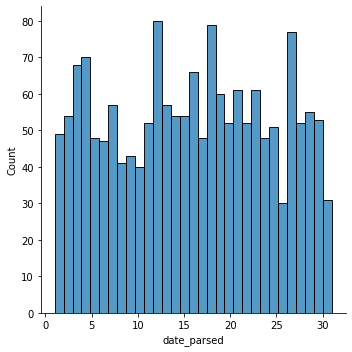

In [15]:
day_of_month = day_of_month.dropna()

sns.displot(day_of_month, kde=False, bins=31)

It looks like our parsing is in order and above graph validate it.